In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.datasets import load_iris


FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris = load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth= 3)
clf = clf.fit(X_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(clf, 'tree.dot', feature_names = FEATURE_NAMES)
! dot -Tpng tree.dot -o tree.png

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)

Accuracy: 0.9555555555555556
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



'dot' is not recognized as an internal or external command,
operable program or batch file.


TypeError: Image data of dtype object cannot be converted to float

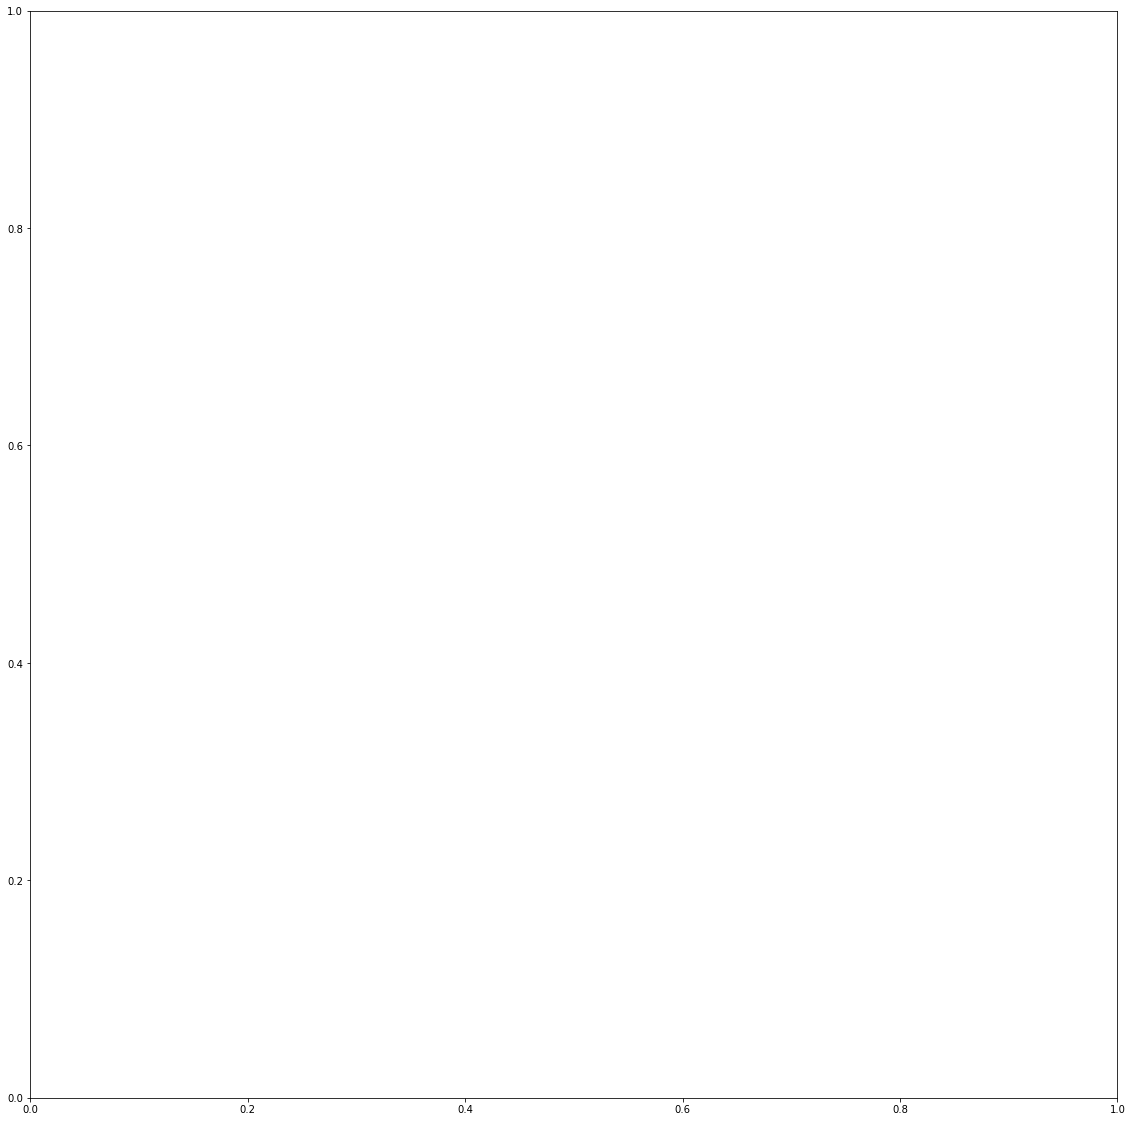

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report,confusion_matrix


df = pd.read_csv('animal.csv')
dummies = pd.get_dummies(df.Animal)
df = pd.concat([df,dummies],axis='columns')
df = df.replace('Yes',1)
df = df.replace('No',0)
#df["Animal_Name"] = df["Animal"].cat.codes
X = df.drop(['Class','Animal'],axis='columns')
FEATURE_NAMES = X.columns
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth= 3)
clf = clf.fit(X_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(clf, 'animal.dot', feature_names = FEATURE_NAMES)
! dot -Tpng animal.dot -o animal.png

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('animal.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)


